In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import h5py

In [2]:
dphi="dphi0p25"
Nbar=100
rho0=32*Nbar
kappa=30/32
poly_flippable=np.loadtxt(f"{dphi}_no_sa/flippable_polymers.csv")
lam=np.loadtxt(f"{dphi}_no_sa/lam.csv")*1/8
q=2*np.pi/lam
rhoc=Nbar*32/(40*40)
print(rhoc)
n_param=len(lam)
n_sim=int(len(poly_flippable)/n_param)
poly_flippable=poly_flippable.reshape(n_param,n_sim).mean(axis=1)
with h5py.File(f"{dphi}_no_sa/coord.h5", 'r+') as f:
    umb_field=np.array(f["umbrella_field"])
n_target=len(umb_field[umb_field>0])
print(n_target)
var_phi=1/(rho0*kappa*(1/8)**2) #composition variance in boundary zone for homogeneous system
print(var_phi)

2.0
3200
0.021333333333333333


[0.03727188 0.0334738  0.01951234 0.01455622 0.00725377 0.0053108
 0.00227988 0.00112395]


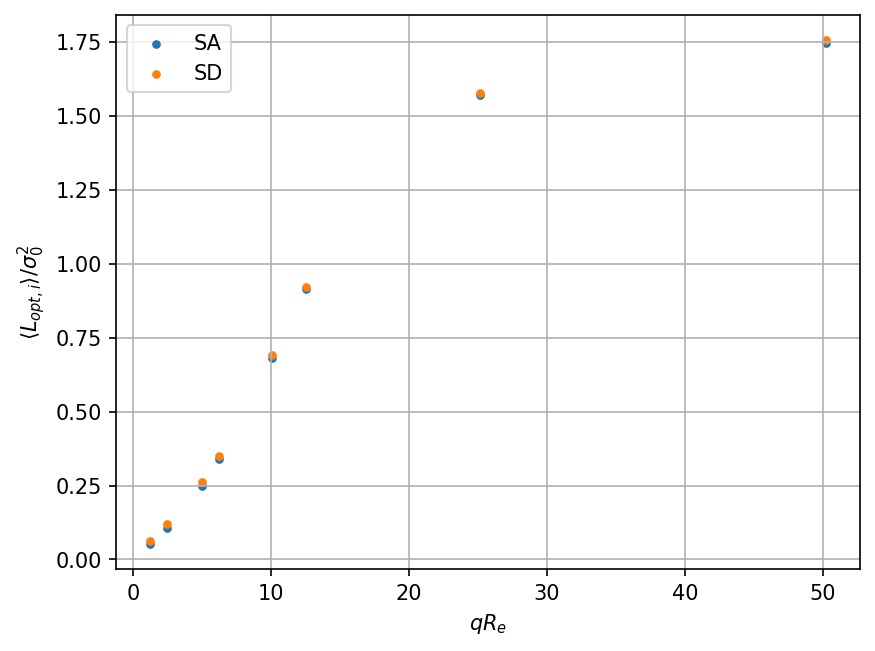

In [3]:
plt.figure(dpi=150)
plt.grid()
plt.xlabel(r"$qR_e$")
plt.ylabel(r"$\langle L_{opt,i}\rangle/\sigma^2_0$")
directory_sa=dphi+"_sa"
directory_no_sa=dphi+"_no_sa"
#number of different parameters
opt_sa=np.loadtxt(f"{directory_sa}/opt.csv")/n_target
flips_sa=np.loadtxt(f"{directory_sa}/flips.csv")
#number of simulations per parameter
n_sim=int(len(opt_sa)/n_param)
opt_no_sa=np.loadtxt(f"{directory_no_sa}/opt.csv")/n_target
flips_no_sa=np.loadtxt(f"{directory_no_sa}/flips.csv")
#reshape arrays
opt_sa=opt_sa.reshape(n_param,n_sim).mean(axis=1)
print(opt_sa)
opt_no_sa=opt_no_sa.reshape(n_param,n_sim).mean(axis=1)
flips_sa=flips_sa.reshape(n_param,n_sim).mean(axis=1)
flips_no_sa=flips_no_sa.reshape(n_param,n_sim).mean(axis=1)
plt.scatter(q,opt_sa/var_phi,label="SA",lw=1,s=10)
plt.scatter(q,opt_no_sa/var_phi,label="SD",s=10,lw=1)
plt.legend()
plt.savefig(f"opt_var_q_{dphi}.pdf")

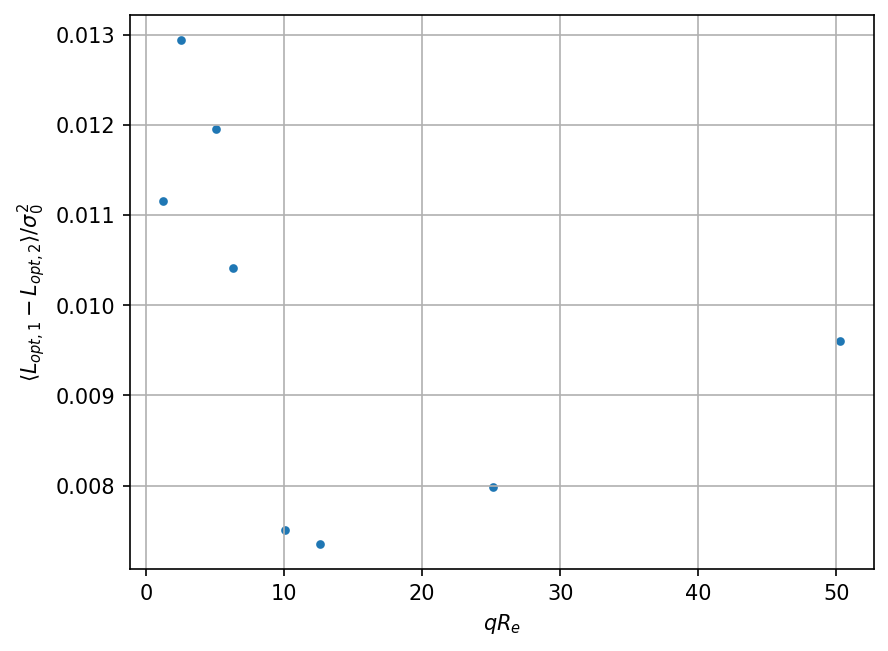

In [4]:
plt.figure(dpi=150)
plt.grid()
plt.xlabel(r"$qR_e$")
plt.ylabel(r"$\langle L_{opt,1}-L_{opt,2}\rangle/\sigma^2_0$")
plt.scatter(q,(opt_no_sa-opt_sa)/var_phi,lw=1,s=10)
plt.savefig(f"diff_var_q_{dphi}.pdf")